# Investigação de dados

## DataSet: _Não comparecimento as consultas médicas_

Esta base de dados possui informações de 100.000 consultas médicas no Brasil e está focado na questão de buscar compreender se o paciente irá ou não comparecer a consulta. As características sobre os pacientes são descritas em cada linha.

<li>**ScheduledDay:** informa o dia em que o paciente marcou sua consulta.
<li>**Neighborhood:** indica a localização do hospital.
<li>**Scholarship:** indica se o paciente está ou não envolvido com o programa Bolsa Família.
Tenha cuidado ao interpretar a última coluna. **'No'** significa que o paciente compareceu a consulta previamente agendada. Por outro lado, **'Yes'** signifca que ele não compareceu.

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Perguntas

**1)** Quem mais falta as consultas homens ou mulheres?<br>
**2)** Qual a proporção de pacientes que não comparecem às consultas?<br>
**3)** Qual a distribuição da idade de pacientes que não comparecem às consultas?<br>
**4)** Há alguma relação entre doença e não comparecimento às consultas?<br>
**5)** Qual a cidade com maior número de não comparecimentos?<br>
**6)** Qual é o mês, dia da semana e dia do mês com maior número de não comparecimentos?<br>
**7)** Há alguma correlação entre a participação no programa social Bolsa Família e os comparecimentos?

## Carregar os dados:


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
#dtype={'AppointmentDay': str}
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv');

df.head()
#df.dtypes

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# **1)** Quem mais falta as consultas homens ou mulheres?

In [4]:
df.groupby(["Gender", "No-show"]).size()



Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
dtype: int64

Conclusão: Com um total de 14.594(mulheres) e 7725(homens) podemos afirmar que as mulheres faltam mais que os homens ás consultas médicas. 




# **2.** Qual a proporção de pacientes que não comparecem às consultas? 


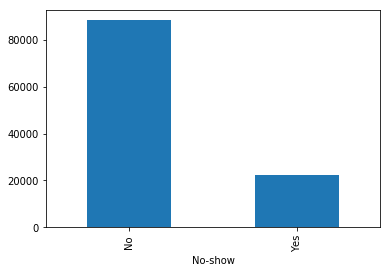

In [3]:
df.groupby('No-show')['AppointmentID'].nunique().plot(kind='bar')



# 3.Qual a distribuição da idade de pacientes que não comparecem às consultas?

In [7]:
distribuicao = df[df['No-show'] == 'Yes']



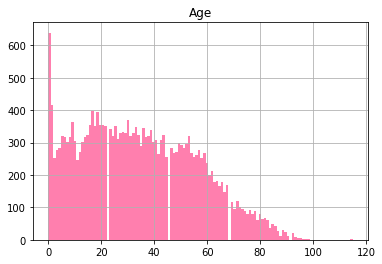

In [12]:
distribuicao[['No-show','Age']].hist(bins=120,alpha=0.5,color='#FF005E')
plt.savefig('nomeDaFigura.png')    


Conclusão: Podemos perceber, que o maior numero de faltas concentram-se em bebês, em seus primeiros meses de vida.

# **4)** Há alguma relação entre doença e não comparecimento às consultas?

Podemos agrupar os dados levando em consideração as doenças e as faltas, o 1 representa que existe determinada doença, e o 0 é que não, primeiro agruparemos as pessoas que tenham pelos menos uma das doenças definidas na base de dados:

In [31]:
hipertensos = df.loc[df['Hipertension'] == 1, ['No-show', 'Hipertension']]
hipertensosCont = hipertensos.loc[hipertensos['No-show'] == 'Yes', ['Hipertension']].count()

diabetes = df.loc[df['Diabetes'] == 1, ['No-show', 'Diabetes']]
diabetesCont = diabetes.loc[diabetes['No-show'] == 'Yes', ['Diabetes']].count()
alcoolismo = df.loc[df['Alcoholism'] == 1, ['No-show', 'Alcoholism']]
alcoolismoCont= alcoolismo.loc[alcoolismo['No-show'] == 'Yes', ['Alcoholism']].count()


Em seguida, contamos a quantidade de vezes que as doenças são detectada nas consultas não realizadas 

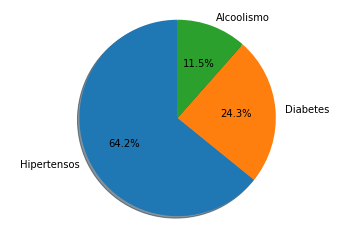

In [35]:

labels = ['Hipertensos', 'Diabetes', 'Alcoolismo']
sizes = [hipertensosCont,diabetesCont , alcoolismoCont]
fig1,ax1= plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()
plt.savefig('pizza.png')    

    
    

Conclusão:Podemos perceber, que os hipertensos são os que tem maiores probabalidade de faltar  

# **5)** Qual a cidade com maior número de não comparecimentos?<br>


In [54]:
cidade= distribuicao.groupby('Neighbourhood').size()
cidade.loc[ cidade['Neighbourhood'].idxmax()]
df_grouped = df.groupby('Neighbourhood').size().reset_index(name='Missing appointments')

#pd.value_counts(distribuicao['Neighbourhood'].values.flatten())

KeyError: 'Neighbourhood'

Como podemos ver, o hospital com maior numero de não comparecimentos é o das proximidades do  JARDIM CAMBURI com 1465 não comparecimentos, o JARDIM CAMBURI, está localizado na cidade de Vitória-ES

# **6)** Qual é o mês, dia da semana e dia do mês com maior número de não comparecimentos?

In [ ]:
Primeiro, iremos transformar a coluna AppointmentDay para o tipo datetime  

In [47]:


distribuicao['AppointmentDay']=pd.to_datetime(distribuicao.AppointmentDay)





/home/vectro26/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Agora, agrupamos o numero de consultas por mês

In [48]:
df.groupby(distribuicao['AppointmentDay'].dt.month).size()


AppointmentDay
4.0      633
5.0    16804
6.0     4882
dtype: int64

Como podemos perceber, o mês 5(MAIO) é o que dispoẽ de maior quantidade de tuplas agrupadas, 
ou seja, ele é o mês com maior numero de faltas. Em seguida, agrupamos os dias do mês 5 
para podemos obter os dados de faltas por dia da semana

In [50]:
dias = distribuicao[distribuicao.AppointmentDay.dt.month==5]
pd.value_counts(dias.AppointmentDay.dt.dayofweek.values.flatten())



1    4336
0    3817
2    3507
4    2599
3    2536
5       9
dtype: int64

Como podemos observar, o dia da semana  que ocorre maior numero de faltas, é a terça-feira
com 4336 faltas

In [136]:
pd.value_counts(dias.AppointmentDay.dt.day.values.flatten())


16    1049
9     1019
10     992
4      973
17     935
13     905
20     899
19     892
18     890
30     888
11     885
2      861
12     837
3      831
24     811
5      807
6      795
31     767
25     759
14       9
dtype: int64

Podemos observar,que no dia 16 é o dia que ocorre o maior numero de faltas, com 1049 faltas ocorridas no dia.

# **7)** Há alguma correlação entre a participação no programa social Bolsa Família e os comparecimentos?

In [144]:
df.groupby(["Scholarship", "No-show"]).size()



Scholarship  No-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
dtype: int64

In [ ]:
Conclusão: Os participantes do Bolsa Famíla correspondem a 10861, os mesmo em sua grande 
maioria, no total de 8283 não faltam as consultas, o que correspondem a 76% das consultas
realizadas com os participantes do programa.
